By Aishwarya Gupta (07700006172)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'housing_price_data.csv'  # Make sure to update the path to the dataset
housing_data = pd.read_csv(file_path)
housing_data.head()



,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


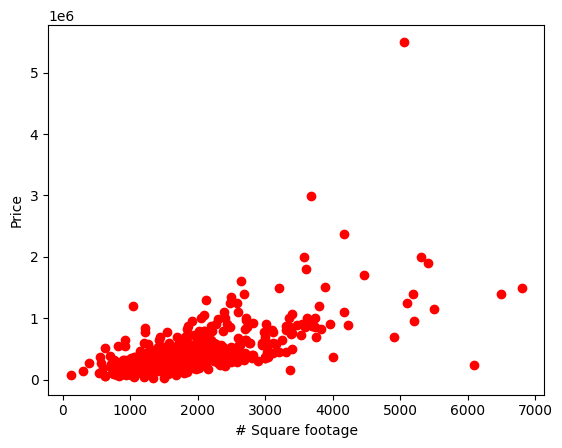

In [5]:
# Plot data points
X, y = (housing_data["Size"].values,housing_data["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [ ]:
# Extract and normalize the 'Size' column
X = housing_data['Size'].values
X_min, X_max = X.min(), X.max()
X_normalized = (X - X_min) / (X_max - X_min)

# Prepare the feature matrix X and target vector y
X_b = np.c_[np.ones((len(X), 1)), X_normalized]  # Add x0 = 1 to each instance
y = housing_data['Price'].values

# Set the number of epochs and learning rate
epochs = 2000
learning_rate = 0.5

# Random initialization of parameters (weights)
np.random.seed(42)
w = np.random.randn(2, 1)

# Batch Gradient Descent
mse_history = []
for epoch in range(epochs):
    gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(w) - y.reshape(-1, 1))
    w -= learning_rate * gradients
    mse = np.mean((X_b.dot(w) - y.reshape(-1, 1))**2)
    mse_history.append(mse)

# Plotting the MSE over epochs
plt.figure(figsize=(10, 5))
plt.plot(mse_history, label='MSE')
plt.title('MSE vs Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the regression line over the training examples
plt.figure(figsize=(10, 5))
plt.plot(X * (X_max - X_min) + X_min, y, 'ro', label='Training data')
X_sort = np.sort(X_normalized)
y_hat = X_sort * w[1][0] + w[0][0]
plt.plot(X_sort * (X_max - X_min) + X_min, y_hat, 'b-', label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.title('Regression Line on Training Examples')
plt.show()

# Predict the price for a 5000 square foot house
size_5000 = (5000 - X_min) / (X_max - X_min)
predicted_price_5000 = size_5000 * w[1][0] + w[0][0]
print("Predicted price for a 5000 square foot house:", predicted_price_5000)
